In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from tesser import fit
from tesser import util
from tesser import tasks

In [8]:

data_dir = "/home/rodrigo/Dropbox/tesser_successor/Data/"

In [9]:
induct_all = util.load_induct(data_dir)
struct_all = util.load_struct(data_dir)

In [10]:
struct_all.SubjNum.unique()

array([100, 101, 102, 103, 104, 105, 106, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 135, 136, 137, 138])

In [11]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)

({'gamma': 0.6273130680196335,
  'alpha': 0.6076447000389573,
  'tau': 9.887333429247505},
 -8623.005462764622)

In [ ]:
fixed = {'alpha': 0.3}
var_names = ['gamma', 'tau']
var_bounds = {'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)


In [ ]:
high =tasks.induct_avg_split_high(tasks.induct_avg_all(data_dir))
hp = high.participant

In [ ]:
struct_high_all = struct_all.copy()
s_all = struct_high_all[struct_high_all['SubjNum'].isin(list(hp))]


In [ ]:
induct_high_all = induct_all.copy()
i_all = induct_high_all[induct_high_all['SubjNum'].isin(list(hp))]

In [ ]:
# High performers

fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(s_all, i_all, fixed, var_names, var_bounds)

High performers as a group have a much lower likelihood -440.54


In [ ]:
# low performers
low =tasks.induct_avg_split_low(tasks.induct_avg_all(data_dir))
lp = low.participant

In [ ]:

struct_low_all = struct_all.copy()
s_all = struct_low_all[struct_low_all['SubjNum'].isin(list(lp))]

In [ ]:
induct_low_all = induct_all.copy()
i_all = induct_low_all[induct_low_all['SubjNum'].isin(list(lp))]

In [ ]:
# low performers logllikelihood 
fixed = {}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(s_all, i_all, fixed, var_names, var_bounds)

Low performers as a group have a much lower likelihood


The sum individual log likelihood is -978.07139 which is much lower the group fitting 

{'gamma': 0.9608818840406562,\n  'alpha': 0.0012432275910420404,\

In [ ]:
struct = util.load_struct_subject(data_dir, 108)
induct = util.load_induct_subject(data_dir, 108)

In [ ]:
from tesser import sr

In [ ]:
#  not fixed
sr_mats = sr.learn_sr(struct, 0.96088,0.00124)
fig = sr.plot_sr(sr_mats)


In [ ]:
#fixed alpha
sr_mats = sr.learn_sr(struct, 0.7775984763983996,0.3)
fig = sr.plot_sr(sr_mats)

In [ ]:
# high performers
sr_mats = sr.learn_sr(struct, 0.9066399717654446,0.05051122724126701)
fig = sr.plot_sr(sr_mats)

In [ ]:
sr_mats = sr.learn_sr(struct, 1,0.5829999328907534)
fig = sr.plot_sr(sr_mats)


In [ ]:
fixed = {'alpha': 0.05051122724126701, 'gamma': 0.7775984763983996,
             'tau': 0.24866146359841507}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
results = fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds)

In [ ]:
results = results.set_index('subject')
results

In [ ]:
res_list = []
for subject in results.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau']}
    res = fit.assess_induct_fit_subject(subj_struct, subj_induct, param)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

In [ ]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

In [13]:
 
fixed = {'w': 1.0}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)

({'w': 1.0,
  'gamma': 1.0,
  'alpha': 0.03864470194792587,
  'tau': 0.2563582021204475},
 -1052.3476917776443)

In [12]:

fixed = {'w': 0.0}
var_names = ['gamma', 'alpha', 'tau']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10]}
fit.fit_induct(struct_all, induct_all, fixed, var_names, var_bounds,
               verbose=False)

({'w': 0.0,
  'gamma': 0.07272385710617596,
  'alpha': 0.21136598219943692,
  'tau': 1.0543420344106194},
 -8623.005462764622)

In [20]:
fixed = {}
var_names = ['gamma', 'alpha', 'tau', 'w']
var_bounds = {'alpha': [0, 1], 'gamma': [0, 1], 'tau': [0, 10], 'w':[0,1]}
results = fit.fit_induct_indiv(struct_all, induct_all, fixed, var_names, var_bounds)

Estimating parameters for 100...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))


Estimating parameters for 101...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))


Estimating parameters for 102...
Estimating parameters for 103...
Estimating parameters for 104...
Estimating parameters for 105...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))


Estimating parameters for 106...
Estimating parameters for 108...
Estimating parameters for 109...
Estimating parameters for 110...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))


Estimating parameters for 111...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
 

Estimating parameters for 112...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
 

Estimating parameters for 113...
Estimating parameters for 114...
Estimating parameters for 115...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
 

Estimating parameters for 116...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /


Estimating parameters for 117...
Estimating parameters for 119...
Estimating parameters for 120...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_s

Estimating parameters for 121...
Estimating parameters for 122...
Estimating parameters for 123...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (su

/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (su

Estimating parameters for 124...
Estimating parameters for 125...
Estimating parameters for 126...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))


Estimating parameters for 127...
Estimating parameters for 128...
Estimating parameters for 129...
Estimating parameters for 130...
Estimating parameters for 131...
Estimating parameters for 132...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (su

Estimating parameters for 133...
Estimating parameters for 135...
Estimating parameters for 136...
Estimating parameters for 137...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
 

Estimating parameters for 138...


/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:49: RuntimeWarning: invalid value encountered in double_scalars
  prob = ((support[response] ** tau) /
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:50: RuntimeWarning: invalid value encountered in double_scalars
  (support[0] ** tau + support[1] ** tau))


In [21]:
results = results.set_index('subject')
results

,gamma,alpha,tau,w,log_like
subject,,,,,
100,1.000000e+00,0.998433,0.146753,1.000000e+00,-28.571714
101,9.927083e-01,0.709634,2.715851,8.945414e-01,-25.372477
102,5.115287e-01,0.000550,0.063166,6.053830e-08,-18.836007
103,9.253145e-01,0.685415,1.307192,1.000000e+00,-25.866745
104,1.000000e+00,0.955659,0.966005,1.000000e+00,-28.344284
105,1.000000e+00,0.174315,1.899971,7.296901e-01,-22.585710
106,1.000000e+00,0.004154,0.125387,3.437705e-01,-54.118704
108,1.000000e+00,0.605441,0.634752,7.336076e-01,-28.682065
109,1.544239e-12,0.118489,0.066215,3.297888e-05,-19.391727


In [22]:
from tesser import fit

In [24]:
res_list = []
for subject in results.index.unique():
    subj_filter = f'SubjNum == {subject}'
    subj_struct = struct_all.query(subj_filter)
    subj_induct = induct_all.query(subj_filter)
    subj_param = results.loc[subject]
    param = {'alpha': subj_param['alpha'], 'gamma': subj_param['gamma'],
             'tau': subj_param['tau'],'w': subj_param['w']}
    res = fit.assess_induct_fit_subject(subj_struct, subj_induct, param)
    res_list.append(res)
fitted = pd.concat(res_list, axis=0)

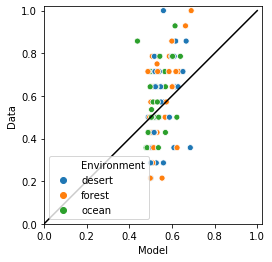

In [25]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='Environment', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

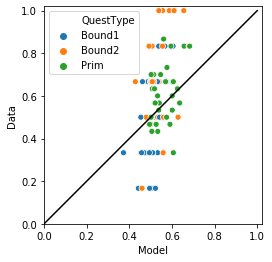

In [26]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean().unstack(level=0)
g = sns.scatterplot(x='Model', y='Data', hue='QuestType', data=m.reset_index());
g.set_xlim(0, 1.02);
g.set_ylim(0, 1.02);
g.set_aspect(1);
g.plot((0, 1), (0, 1), '-k');

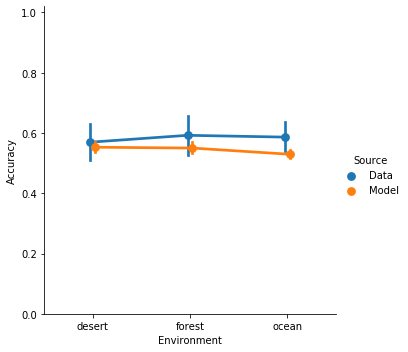

In [27]:
m = fitted.groupby(['Source', 'SubjNum', 'Environment'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='Environment', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));

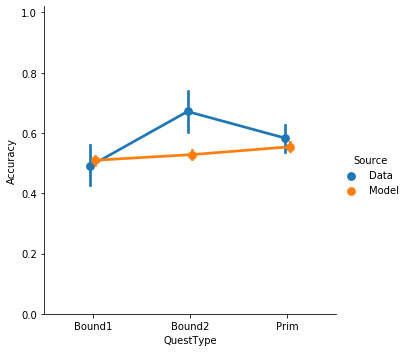

In [28]:
m = fitted.groupby(['Source', 'SubjNum', 'QuestType'])['Accuracy'].mean()
g = sns.catplot(kind='point', x='QuestType', y='Accuracy', 
                hue='Source', dodge=True, data=m.reset_index())
g.set(ylim=(0, 1.02));